# The Importance of Normalizing Features for PCA 

In this notebook, I run through a quick practical example on the importance of feature scaling when planning to run a principal components procedure(PCA). This notebook assumes some basic understanding of what PCA and singular value decomposition. I quickly learned this lesson as a student working on a project for a class at Virginia Tech. 

I was working on a project related to opioid overdoses in the state of Ohio from 2011-2015. We were interested in exploring how differences in socioeconomic factors about certain counties related to the opioid usage in that county. To do this, my team planned to perform PCA on the socioeconomic data and perform k-means clustering on the resulting principal components. Then, we would do follow up analysis surrounding the opioid use within the naturally occurring clusters. PCA is useful in this scenario for two main reasons. The first is the socioeconomic data exhibits multicollinearity in our features. Secondly, PCA makes visualizing our Kmeans procedure easier. In this notebook, I present to you the data as I had it and how the failing to normalize my data affected my PCA which would of in turn affected analysis further downstream. So lets go to it..

First we will take care of our basic imports and data load. 

In [35]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("data\data.csv")



Let's get ourselves acquainted with the data I was describing above. For simplicity, we only have a data matrix with 3 features in this example. However, since PCA is a dimension reduction technique, we often have many if not hundreds of features we wish to reduce to just a few. Our goal is to reduce our 3 features to 2.

In [8]:
df.head(10)

,Unnamed: 0,County,Total Deaths,Avg Education,Avg Unemploy,Median HH Income
0,0,MONTGOMERY,239.722687,0.257,7.46,46696
1,1,BROWN,226.675129,0.121,9.16,47202
2,2,BUTLER,226.909487,0.284,6.88,58954
3,3,CLERMONT,223.754713,0.271,6.78,62214
4,4,ADAMS,199.082797,0.105,11.32,36609
5,5,CLARK,205.047088,0.181,7.12,47651
6,6,TRUMBULL,186.182527,0.173,8.56,42831
7,7,SCIOTO,191.565922,0.144,10.42,37277
8,8,CLINTON,191.227441,0.158,9.72,47055
9,9,ROSS,196.995814,0.147,7.76,45615


The first column is an index that I should of dropped before I exported this data(oh well. I will drop it in a second). So we will ignore that. The total deaths is the total number of opioid overdoes over the timeperiod. 'Avg Education' is the average proportion of the population that held a college degree. 'Avg Unemploy' is the average unemployment rate over the time period. The median household income is the average median household(read: average of the yearly median household incomes) income over the same time.

Note that deaths column is not a feature of the model that we wish to build. Only proportion education, average unemployment, and median household income are the features. As I mentioned previously, these features are obviously highly correlated. So PCA is an appropriate and useful technique to use. We will make use of the PCA procedure from sklearn. However, as with most procedures, theres many ways we could tackle this. However, sklearn tends to be the most friendly to practioners. We need to import this and clean up our data and reduce this to our data matrix. The documentation for sklearn PCA can be found [here](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [17]:
from sklearn.decomposition import PCA 

data_matrix = np.array(df.iloc[:,3:6])
pca = PCA() #intialize the PCA procedure, keeping all components. Eventually we will reduce this. 
pca.fit(data_matrix) #fit to our data
X =  pca.transform(data_matrix)

We've now executed the PCA procedure on our data. Where $X$ is our new data matrix containing our principal components. It is important we explore how much variation each component.

In [18]:
pca.explained_variance_ratio_

array([  9.99999989e-01,   1.05484902e-08,   3.42372512e-11])

The cell above should immediately set off red flags. This suggests that we have extreme multicollinearity present. Although it is true that we certainly have a significant amount, not to this extent. The result here essentially suggests that we should only have one feature in our analysis and that this one single principal component will contain almost all of the original information. 

So where did we go wrong? Take a look at our data set. We see that our 3 features are of significantly different scales. As a result, our matrix is approximately rank 1 and thus rank defficient. We could explore the possibility of using a sparse PCA approach. However, a much easier fix is often simply ensuring that we normalize our data matrix, column wise. We can utilize scikit learn once again and it's preprocessing package. The documentation for this function can be found [here](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html). By setting the axis parameter to 0, it allows us to normalize each feature independtly. 

In [31]:
from sklearn.preprocessing import normalize

normed_data = normalize(data_matrix, axis=0)
normed_data[1:10,:] #print the first 10 rows of the matrix to get an idea of our data. 

array([[ 0.0629163 ,  0.12802904,  0.09711264],
       [ 0.14767131,  0.09616155,  0.12129102],
       [ 0.14091171,  0.09476385,  0.12799809],
       [ 0.05459679,  0.15821929,  0.07531877],
       [ 0.09411446,  0.09951602,  0.09803641],
       [ 0.08995471,  0.11964286,  0.08811982],
       [ 0.0748756 ,  0.14564002,  0.07669311],
       [ 0.08215517,  0.13585614,  0.09681021],
       [ 0.0764355 ,  0.10846128,  0.09384757]])

Now we can rerun our PCA procedure on our new normalized matrix.

In [25]:
new_PCA = PCA()
new_PCA.fit(normed_data)
normed_PCA = new_PCA.transform(normed_data)
new_PCA.explained_variance_ratio_

array([ 0.82419167,  0.13222084,  0.0435875 ])

We now see that this is a much more acceptable result, and one that would make more sense from our data. We can easily visualize our new data and plot our two principal components in 2 dimensions. Since we only started with 3 features, and we utilize PCA as a dimension reduction technique, taking more than 2 components would not make sense. As I previously stated, the goal of this was to utilize PCA to then run kmeans and visualize the data easily. 

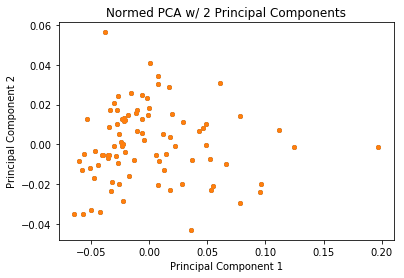

In [37]:
#Plot new PCA
plt.plot(normed_PCA[:, 0], normed_PCA[:, 1], 'o', markersize=4)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Normed PCA w/ 2 Principal Components")
plt.show()

We can now run a Kmeans or another analysis we are interested in. As we have seen, it is vital to ensure that your matrix is not rank defficient prior to running PCA. Often times, this is a result from significantly different scale in features and can be corrected by simply normalizing your data matrix column wise. Other times, a sparse matrix PCA procedure should be explored. 